In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/0rame/Desktop/ML_tutorials/Datas/salaries.csv")

In [4]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [9]:
inputs = df.drop(['salary_more_then_100k'],axis=1)
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [16]:
target = df['salary_more_then_100k']

In [5]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [10]:
inputs['company_new'] = le_company.fit_transform(inputs['company'])
inputs['job_new'] = le_job.fit_transform(inputs['job'])
inputs['degree_new']= le_degree.fit_transform(inputs['degree'])

In [11]:
le_company.classes_

array(['abc pharma', 'facebook', 'google'], dtype=object)

In [12]:
le_job.classes_

array(['business manager', 'computer programmer', 'sales executive'],
      dtype=object)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
inputs.drop(['company','job','degree'],axis=1,inplace=True)

In [15]:
inputs

,company_new,job_new,degree_new
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [17]:
model = DecisionTreeClassifier()

In [18]:
model.fit(inputs,target)

DecisionTreeClassifier()

In [19]:
model.score(inputs,target)

1.0

In [20]:
model.predict([[2,1,1]])

C:\Users\0rame\anaconda3\envs\venv2\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [21]:
importance = model.feature_importances_

In [22]:
importances = pd.Series(importance,index=inputs.columns)

In [23]:
importances

company_new    0.400000
job_new        0.333333
degree_new     0.266667
dtype: float64

In [32]:
import matplotlib.pyplot as plt

<Axes: >

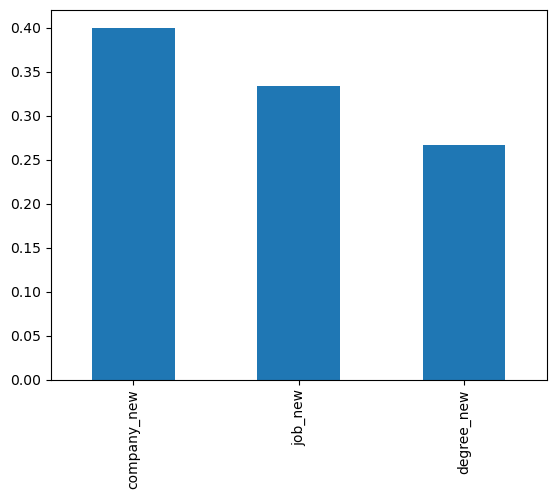

In [33]:
importances.plot.bar()

In [34]:
importance

array([0.4       , 0.33333333, 0.26666667])

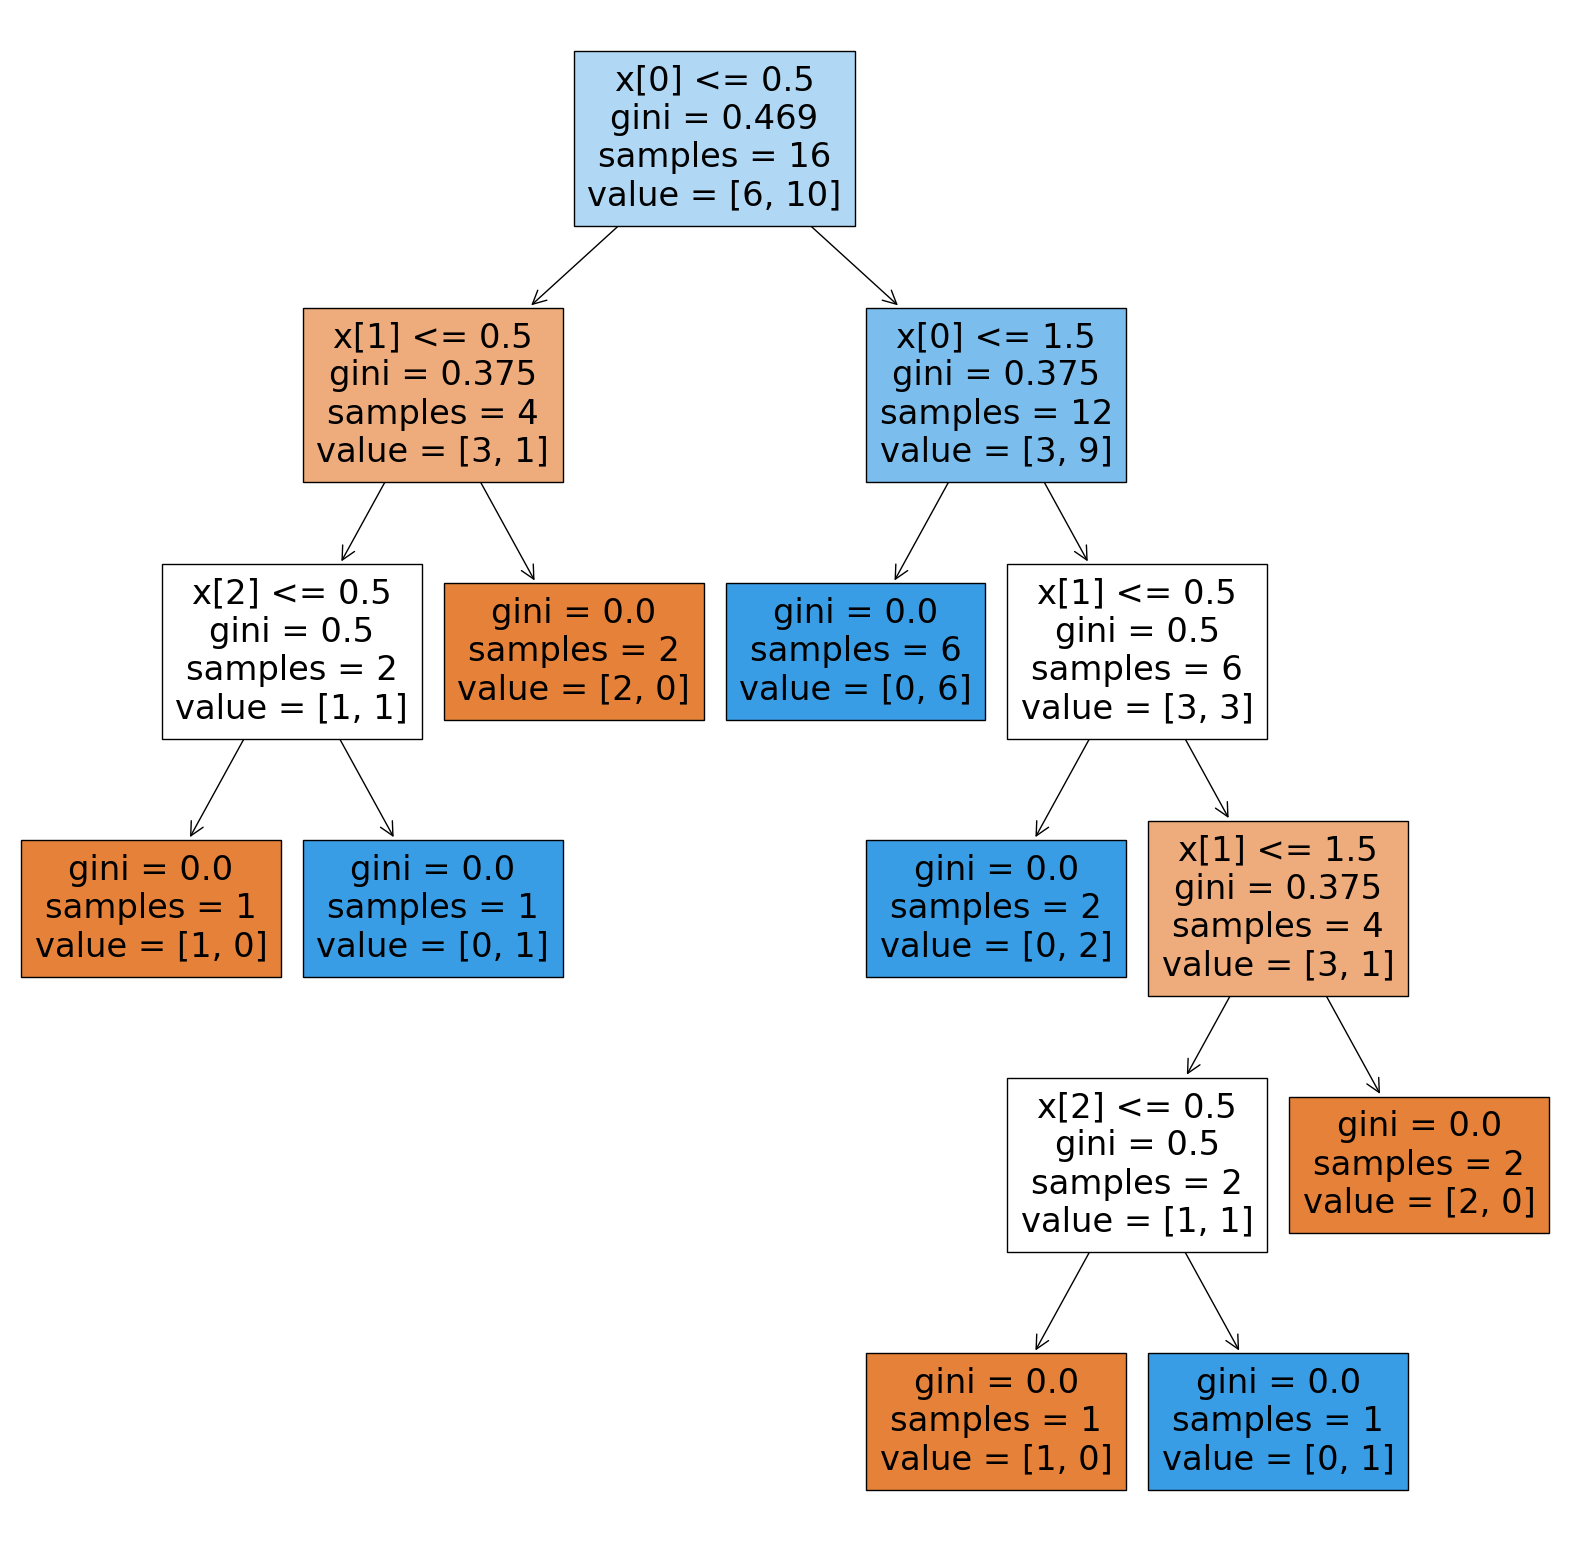

In [43]:
from sklearn import tree
fig = plt.figure(figsize = (20,20))
l = tree.plot_tree(model,filled=True)
fig.savefig('decisiontree.png')
